# Description

## Objective
Goal: Predict whether a bank's customer will stay or leave the bank.

Business Case: Banking


## Data Source
[Churn Modelling](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling) : The dataset contains details of a bank's customers, and the target variable is a binary variable reflecting whether the customer left the bank (closed their account) or continues to be a customer

## Data Description

1. RowNumber : Row Numbers from 1 to 10000
2. CustomerId : Unique Ids for bank customer identification
3. Surname : Customer's last name
4. CreditScore : Credit score of the customer
5. Geography : The country from which the customer belongs
6. Gender : Male or Female
7. Age : Age of the customer
8. Tenure : Number of years for which the customer has been with the bank
9. Balance : Bank balance of the customer
10. NumOfProducts : Number of bank products the customer is utilising
11. HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not
12. IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not
13. EstimatedSalary : Estimated salary of the customer in Dollars
14. Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

# Import

In [237]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
path = "drive/My Drive/Churn/dataset/"


In [239]:
dataset = pd.read_csv(path+'Churn_Modelling.csv')

# EDA Dataset

## Check dataset info

In [240]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [241]:
dataset.Geography = dataset.Geography.astype('category')
dataset.NumOfProducts = dataset.NumOfProducts.astype('category')
dataset.IsActiveMember = dataset.IsActiveMember.astype('object')
dataset.HasCrCard = dataset.HasCrCard.astype('object')
dataset.IsActiveMember = dataset.IsActiveMember.astype('object')
dataset.Exited = dataset.Exited.astype('object')

In [242]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  object  
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  category
 10  HasCrCard        10000 non-null  object  
 11  IsActiveMember   10000 non-null  object  
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  object  
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 957.5+ KB


In this case, the dataset uses low memory, so there's no need to minimize the space of this dataset.

In [243]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Missing Data

In [244]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

There is no missing data in this dataset.

## Check duplicate data

In [245]:
dataset.duplicated().any()

False

There are no duplicate entries in this dataset.

### Check Duplicate Surname

In general, surnames can be duplicate. This means we are going to look at the customer ID.

In [246]:
dataset.CustomerId.duplicated().any()

False

## Delete unnecessary feature

In [247]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

## Summary Statistics

In [248]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


Info

1. The oldest age is 92, the youngest is 18, and the average is around 37.
2. The longest usage of this bank is 10 years, with an average of 5 years."

"The 'HasCrCard' and 'IsActiveMember' variables are both binary, so we will plot them.

If the model doesn't work well, we will hypothesize using age and tenure."

## Correlations

<ipython-input-249-4450f3c53339>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


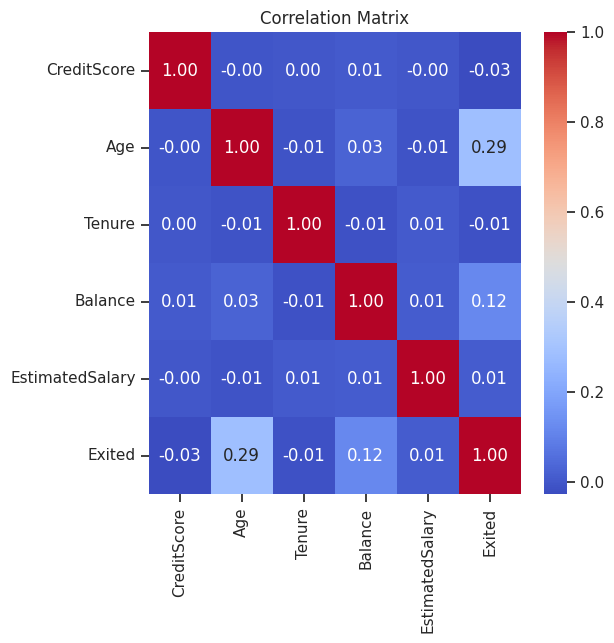

In [249]:
dataset.Exited = dataset.Exited.astype('int')
correlation_matrix = dataset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
dataset.Exited = dataset.Exited.astype('object')

Age and balance have an influential effect on the likelihood of Exited.

## Univariate Analysis

In [250]:
binary_list = dataset.select_dtypes(include=['object']).columns
category_list = dataset.select_dtypes(include=['category']).columns

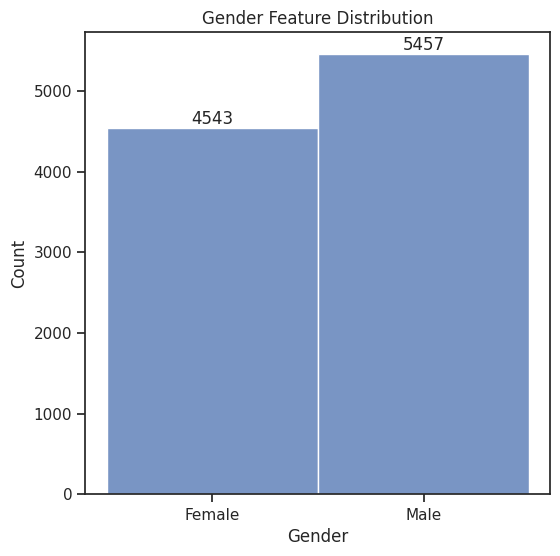

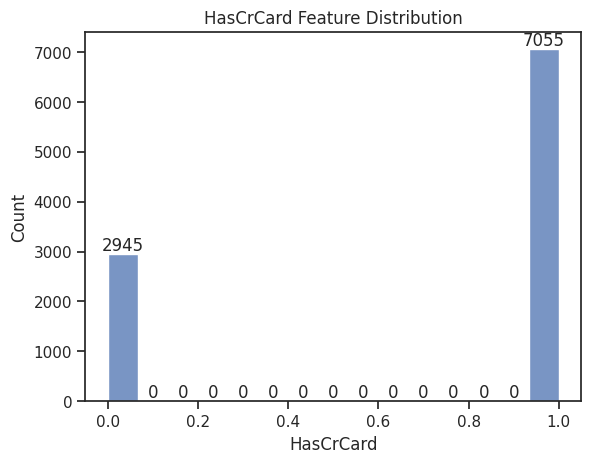

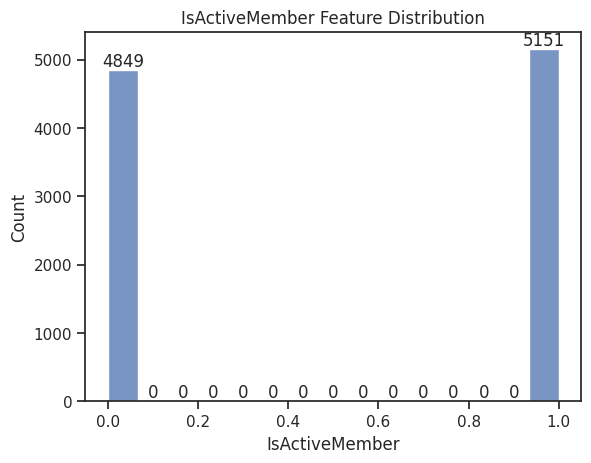

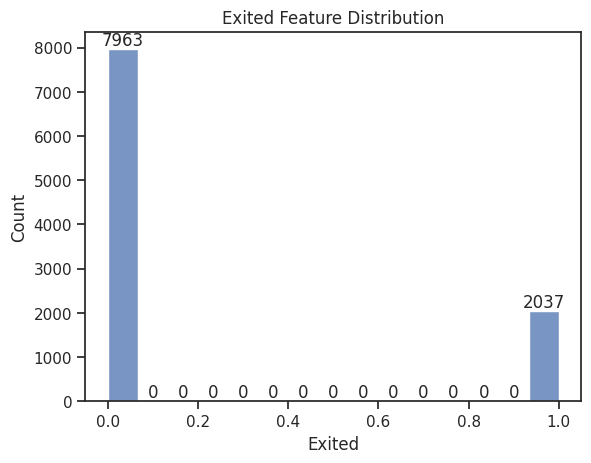

In [251]:
plt.figure(figsize=(6, 6))
for col in binary_list:
  ax = sns.histplot(data=dataset, x=col)
  for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom')
  plt.title(f'{col} Feature Distribution')
  plt.show()
  print()


In this case we will use SMOTE due to the data is Imbalance.

In reality, it is common for users to have a low rate of discontinuing banking services."

## Categorical Variables

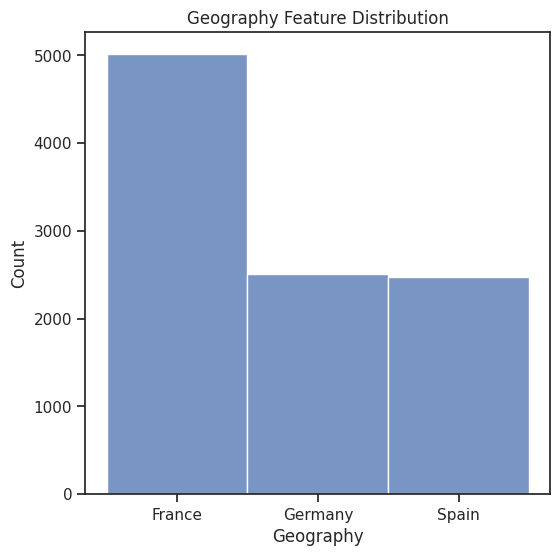

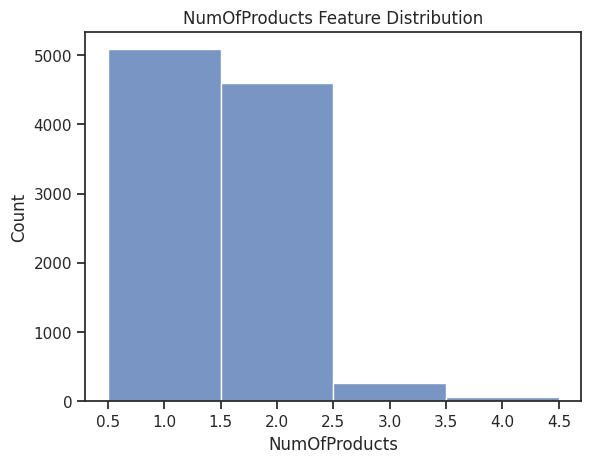

In [252]:
plt.figure(figsize=(6, 6))
for col in category_list:
  sns.histplot(data=dataset, x=col)
  plt.title(f'{col} Feature Distribution')
  plt.show()
  print()


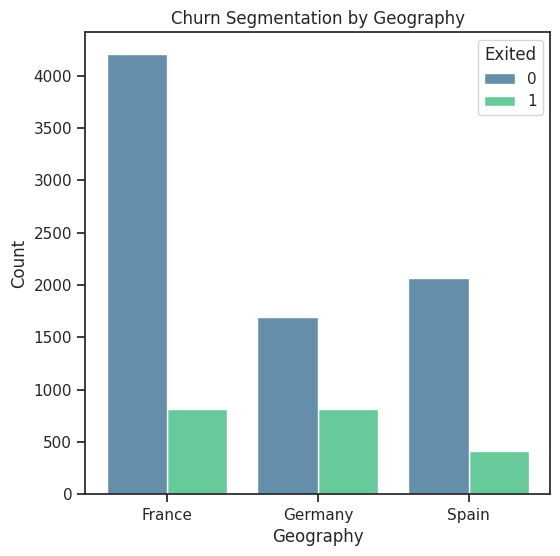

In [253]:
plt.figure(figsize=(6, 6))
sns.histplot(data=dataset, x='Geography', hue='Exited', multiple='dodge', shrink=0.8, palette='viridis', stat='count')
plt.title('Churn Segmentation by Geography')
plt.show()

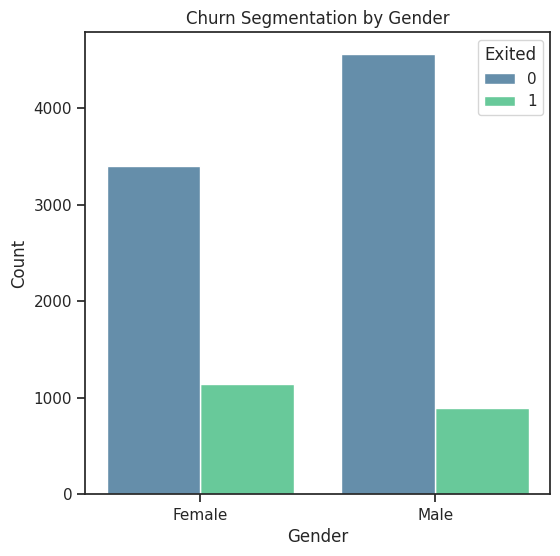

In [254]:
plt.figure(figsize=(6, 6))
sns.histplot(data=dataset, x='Gender', hue='Exited', multiple='dodge', shrink=0.8, palette='viridis', stat='count')
plt.title('Churn Segmentation by Gender')
plt.show()

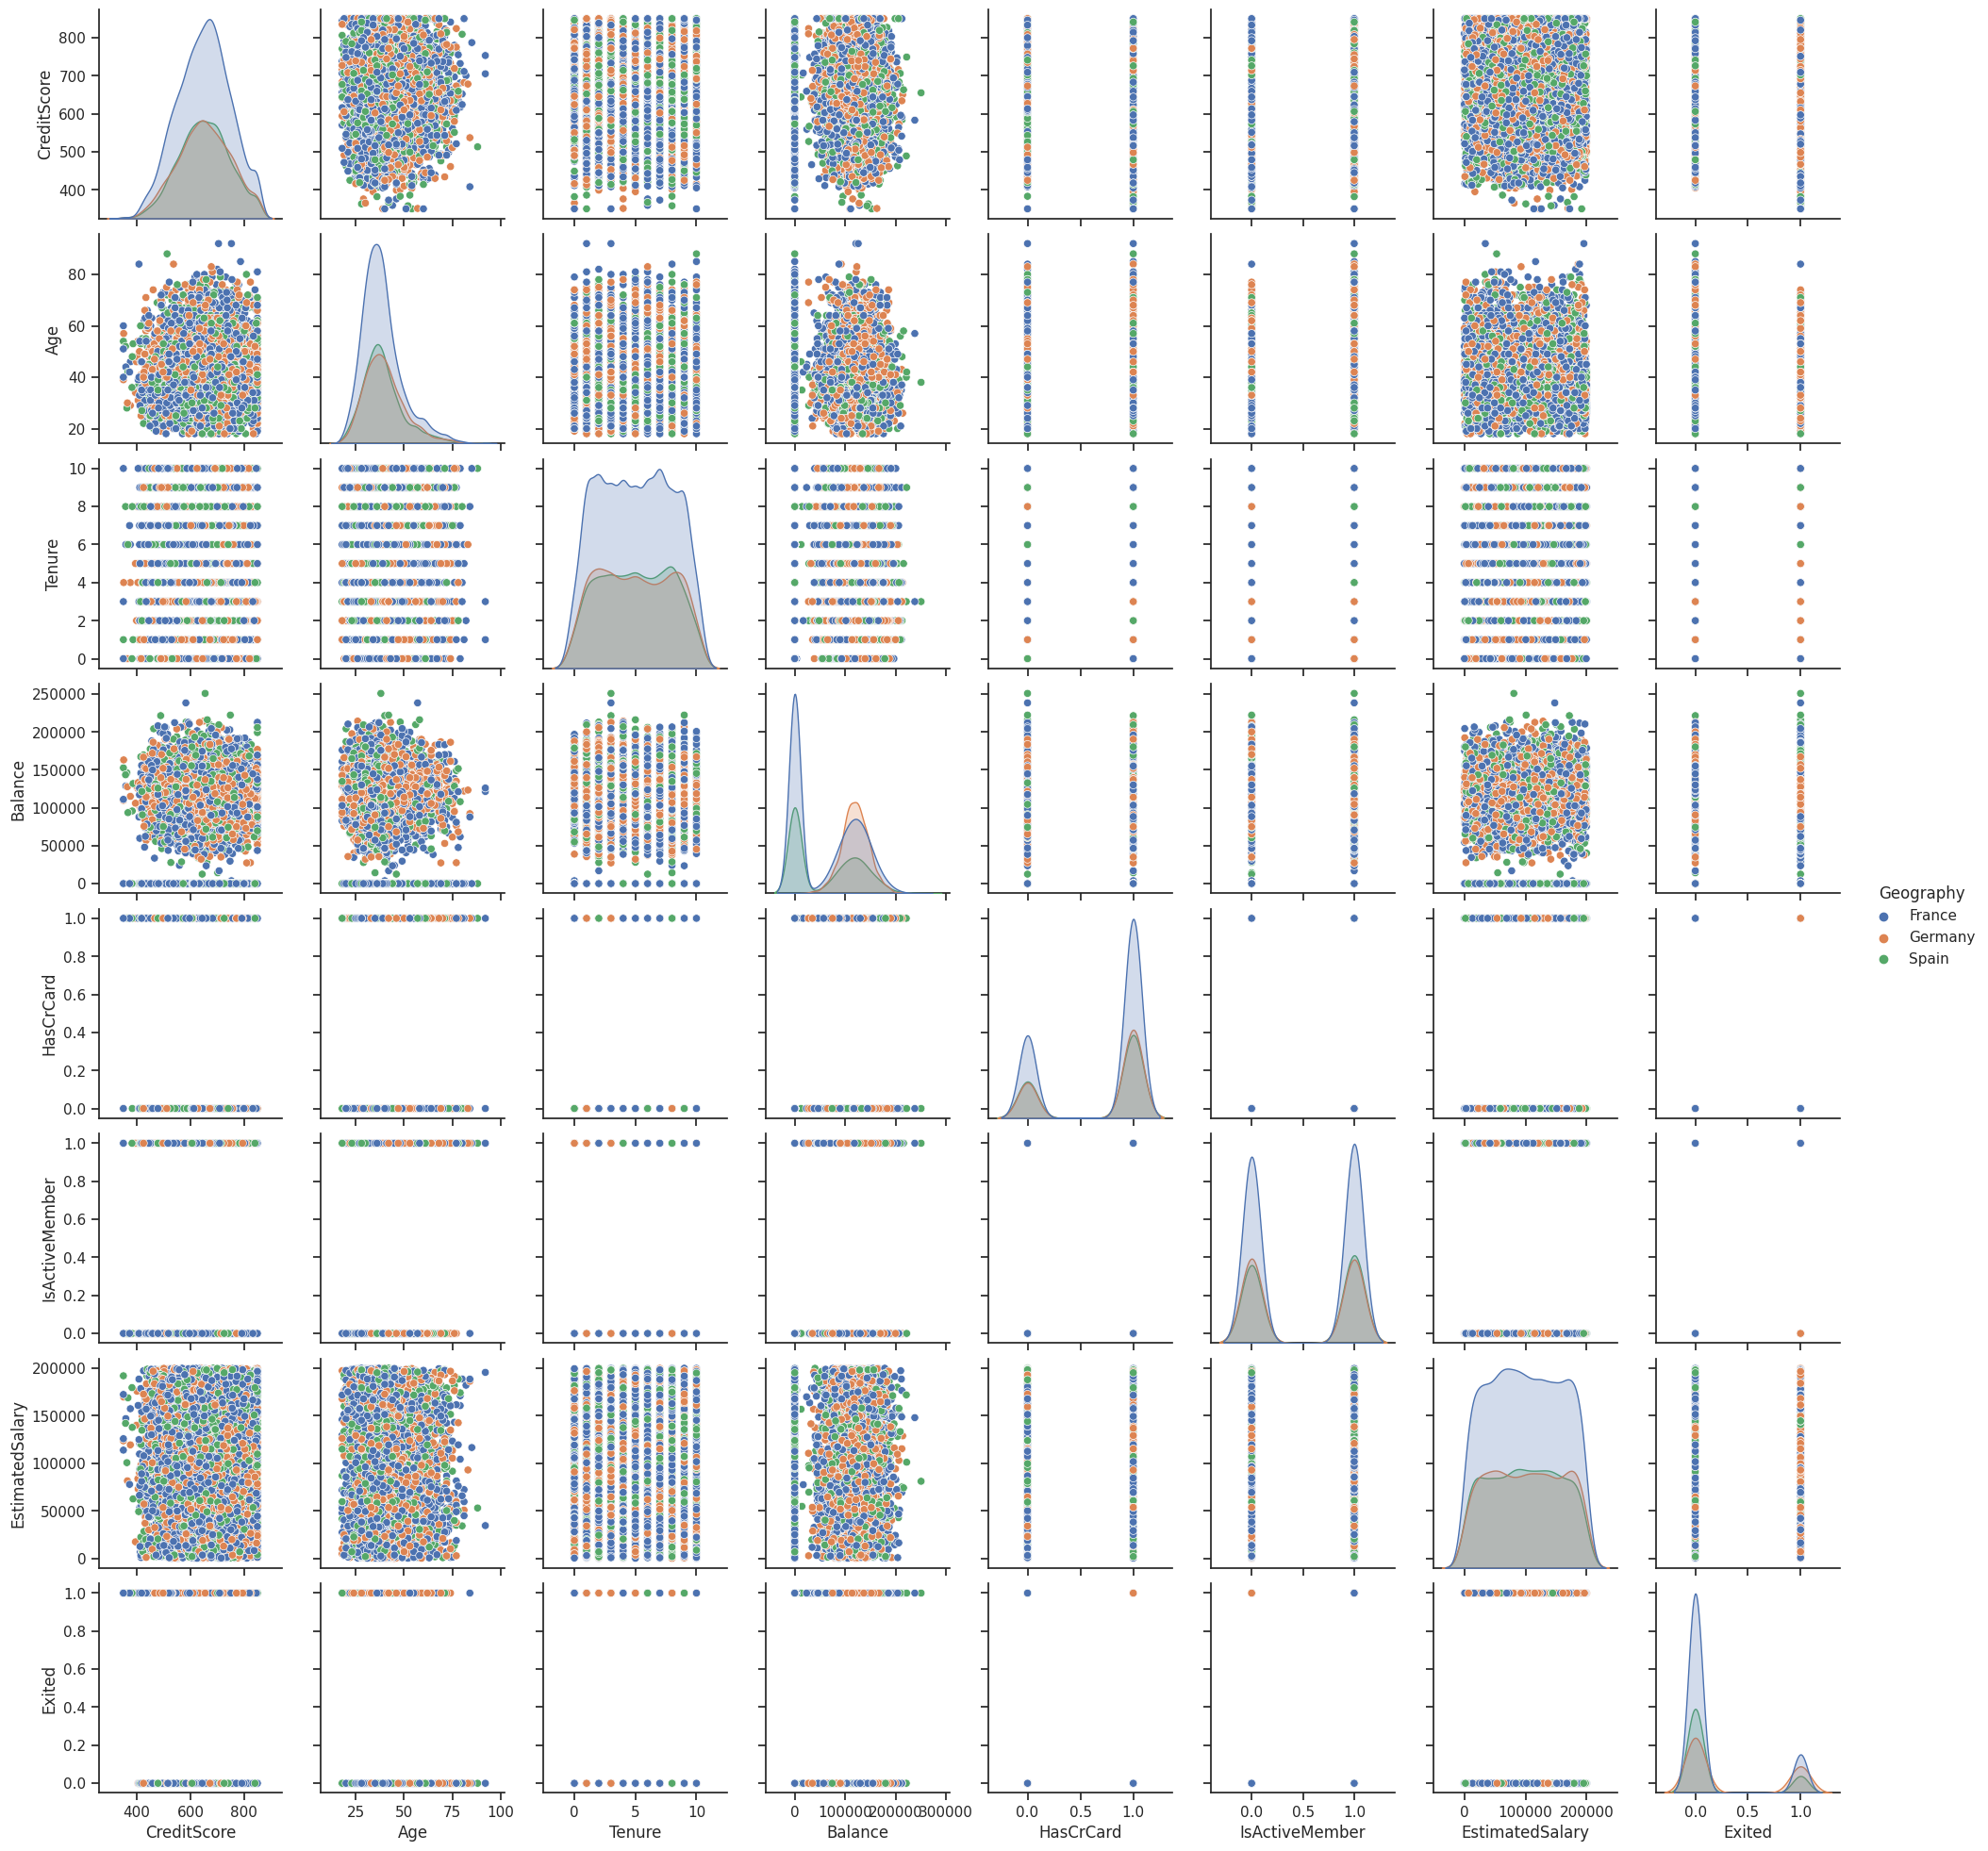

In [255]:
sns.set(style="ticks")
sns.pairplot(dataset, diag_kind="kde", markers="o", hue="Geography")

# Show the plots
plt.show()

The data has small between distance (but it show between 2 dimension), so may be it will have distance if we cluster more than 3-4 feature)

# Machine Learning Model

In this experiment we will use Logistic regression, SVM, and RandomForest

## Preprocessing

In [256]:
X = dataset.drop(['Exited'],axis=1)
y = dataset.Exited
y = y.astype('int')

In [257]:
cat_features  = X.select_dtypes(include=['category','object']).columns
num_features  = [col for col in X.columns if col not in cat_features]


In [258]:
column_transformer = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)

We use normalize with MinMaxScaler, and OneHotEncoder in case of category feature

we select OneHotEncoder due to the category feature don't have any order.

In [259]:
X_transformed = column_transformer.fit_transform(X)
transformed_feature_names = column_transformer.get_feature_names_out()
X_transformed_dataset = pd.DataFrame(X_transformed, columns=transformed_feature_names)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [260]:
X_transformed_dataset.head()

,minmaxscaler__CreditScore,minmaxscaler__Age,minmaxscaler__Tenure,minmaxscaler__Balance,minmaxscaler__EstimatedSalary,onehotencoder__Geography_France,onehotencoder__Geography_Germany,onehotencoder__Geography_Spain,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__NumOfProducts_1,onehotencoder__NumOfProducts_2,onehotencoder__NumOfProducts_3,onehotencoder__NumOfProducts_4,onehotencoder__HasCrCard_0,onehotencoder__HasCrCard_1,onehotencoder__IsActiveMember_0,onehotencoder__IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.516,0.310811,0.1,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Train-Test split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_dataset, y, test_size=0.1, random_state=42)

## Cross validation with Random Forest

In [262]:
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
rf_param_grid = {
     'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # Explicitly set max_features to 'sqrt'
}

In [263]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_grid_search =  RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='accuracy')

In [264]:
rf_best_params = rf_grid_search.best_params_
rf_best_estimator = rf_grid_search.best_estimator_
rf_best_params,rf_best_estimator

({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50))

## Cross validation with SVM

In [265]:
from sklearn.svm import SVC
# svm_param_grid = {
#     'C': [0.001, 0.01, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.1, 1, 10]
# }
svm_param_grid = {
    'C': [0.01, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

sv =  SVC()
sv_grid_search =  RandomizedSearchCV(sv, svm_param_grid, cv=5, scoring='accuracy')
sv_grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 1, 10],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [266]:
sv_best_params = sv_grid_search.best_params_
sv_best_estimator = sv_grid_search.best_estimator_
sv_best_params,sv_best_estimator

({'kernel': 'rbf', 'gamma': 'auto', 'C': 10}, SVC(C=10, gamma='auto'))

## Cross validation with Logistic regression

In [267]:
from sklearn.linear_model import LogisticRegression
# logistic_param_grid = {
#     'C': [0.001, 0.01, 10, 100],
#     'penalty': ['l1', 'l2']
# }
logistic_param_grid = {
    'C': [0.01, 1, 10],
    'penalty': ['l1', 'l2']
}

lr = LogisticRegression()
lr_grid_search =  RandomizedSearchCV(sv, svm_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 1, 10],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [268]:
lr_best_params = lr_grid_search.best_params_
lr_best_estimator = lr_grid_search.best_estimator_
lr_best_params,lr_best_estimator

({'kernel': 'rbf', 'gamma': 0.1, 'C': 10}, SVC(C=10, gamma=0.1))

## Display evaluation metrics

In [269]:
## create function for use it later
def evaluate_metrics(all_model,X_test,y_test):
  lst = []
  for name,model in all_model:
    pred = model.predict(X_test)
    lst.append([name,
                      precision_score(y_test, pred, average='macro'),
                      recall_score(y_test, pred, average='macro'),
                      f1_score(y_test, pred, average='macro'),
                      accuracy_score(y_test, pred)])
  eval_df = pd.DataFrame(lst, columns=['model', 'precision', 'recall', 'f1_macro', 'accuracy'])
  eval_df.set_index('model', inplace = True)
  return eval_df

In [270]:
lst = []
all_model = [("logistic",lr_grid_search),("svm",sv_grid_search),("random forest",rf_grid_search)]
model_result= evaluate_metrics(all_model,X_test,y_test)
model_result = model_result.reset_index()

In this case we select random forest due to the highest recall

## Model with Smote

In [271]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
rf_grid_search_smote =  rf_grid_search.fit(X_smote,y_smote)


In [272]:
rf_smote_result =[('random forest smote',rf_grid_search_smote)]
evl = evaluate_metrics(rf_smote_result,X_test,y_test)
model_result = model_result.append(evl.reset_index(),ignore_index=True)
evl

<ipython-input-272-ddc4d58ee06e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_result = model_result.append(evl.reset_index(),ignore_index=True)


,precision,recall,f1_macro,accuracy
model,,,,
random forest smote,0.716072,0.736007,0.724954,0.822


## Let try cluster to create new feature

We want to cluster by using CreditScore, Age, estimateSalary,Geography and balance to create group of the customer

In [273]:
X_transformed_dataset.head()

,minmaxscaler__CreditScore,minmaxscaler__Age,minmaxscaler__Tenure,minmaxscaler__Balance,minmaxscaler__EstimatedSalary,onehotencoder__Geography_France,onehotencoder__Geography_Germany,onehotencoder__Geography_Spain,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__NumOfProducts_1,onehotencoder__NumOfProducts_2,onehotencoder__NumOfProducts_3,onehotencoder__NumOfProducts_4,onehotencoder__HasCrCard_0,onehotencoder__HasCrCard_1,onehotencoder__IsActiveMember_0,onehotencoder__IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.506735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.516,0.310811,0.1,0.334031,0.562709,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.569654,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.469120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.395400,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [274]:
cluster_X_transformed_dataset =  X_transformed_dataset.filter(regex='CreditScore|Age|EstimatedSalary|Balance|Geography')


In [275]:
from sklearn.cluster import KMeans

n_clusters = 3  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_transformed_clustered = kmeans.fit_predict(cluster_X_transformed_dataset)
cluster_X_transformed_dataset['Cluster'] = X_transformed_clustered
X_train['Cluster'] = cluster_X_transformed_dataset.loc[X_train.index, 'Cluster']
X_test['Cluster'] = cluster_X_transformed_dataset.loc[X_test.index, 'Cluster']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-275-bf2cccb28ca1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_X_transformed_dataset['Cluster'] = X_transformed_clustered


## See the result after create cluster

In [276]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
rf_grid_search_smote_cluster =  rf_grid_search.fit(X_smote,y_smote)
rf_smote_cluster_result = [('random forest cluster smote',rf_grid_search_smote_cluster)]
evl = evaluate_metrics(rf_smote_cluster_result,X_test,y_test)
model_result = model_result.append(evl.reset_index(),ignore_index=True)
evl

<ipython-input-276-aa8f67cd95e9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_result = model_result.append(evl.reset_index(),ignore_index=True)


,precision,recall,f1_macro,accuracy
model,,,,
random forest cluster smote,0.729858,0.744187,0.73651,0.832


In [277]:
rf_grid_search_cluster = rf_grid_search.fit(X_train, y_train)
lr_grid_search_cluster = lr_grid_search.fit(X_train, y_train)
sv_grid_search_cluster = sv_grid_search.fit(X_train, y_train)


In [278]:
all_model_cluster = [("logistic cluster",lr_grid_search_cluster),("svm cluster",sv_grid_search_cluster),("random forest cluster",rf_grid_search_cluster)]
evl =evaluate_metrics(all_model_cluster,X_test,y_test)
model_result = model_result.append(evl.reset_index(),ignore_index=True)
evl

<ipython-input-278-ecb9898d1183>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_result = model_result.append(evl.reset_index(),ignore_index=True)


,precision,recall,f1_macro,accuracy
model,,,,
logistic cluster,0.847641,0.669358,0.709420,0.863
svm cluster,0.855078,0.655505,0.694526,0.860
random forest cluster,0.811366,0.701972,0.736221,0.864


# Conclusion

In [279]:
model_result

,model,precision,recall,f1_macro,accuracy
0,logistic,0.840720,0.680593,0.720519,0.865
1,svm,0.839399,0.663504,0.702138,0.860
2,random forest,0.821343,0.708444,0.743980,0.868
3,random forest smote,0.716072,0.736007,0.724954,0.822
4,random forest cluster smote,0.729858,0.744187,0.736510,0.832
5,logistic cluster,0.847641,0.669358,0.709420,0.863
6,svm cluster,0.855078,0.655505,0.694526,0.860
7,random forest cluster,0.811366,0.701972,0.736221,0.864


# Save model

In [292]:
import joblib
result_dict = {
    "lr" : lr_grid_search,
    "svc" : sv_grid_search,
    "rf" : rf_grid_search,
    "rfSmote" :rf_grid_search_smote,
    "rfSmoteCluster" : rf_grid_search_smote_cluster,
    "lrCluster":lr_grid_search_cluster,
    "rfCluster":rf_grid_search_cluster,
    "svCluster":sv_grid_search_cluster
}
joblib.dump(result_dict['rfSmoteCluster'], 'rfSmoteCluster.joblib')


['rfSmoteCluster.joblib']